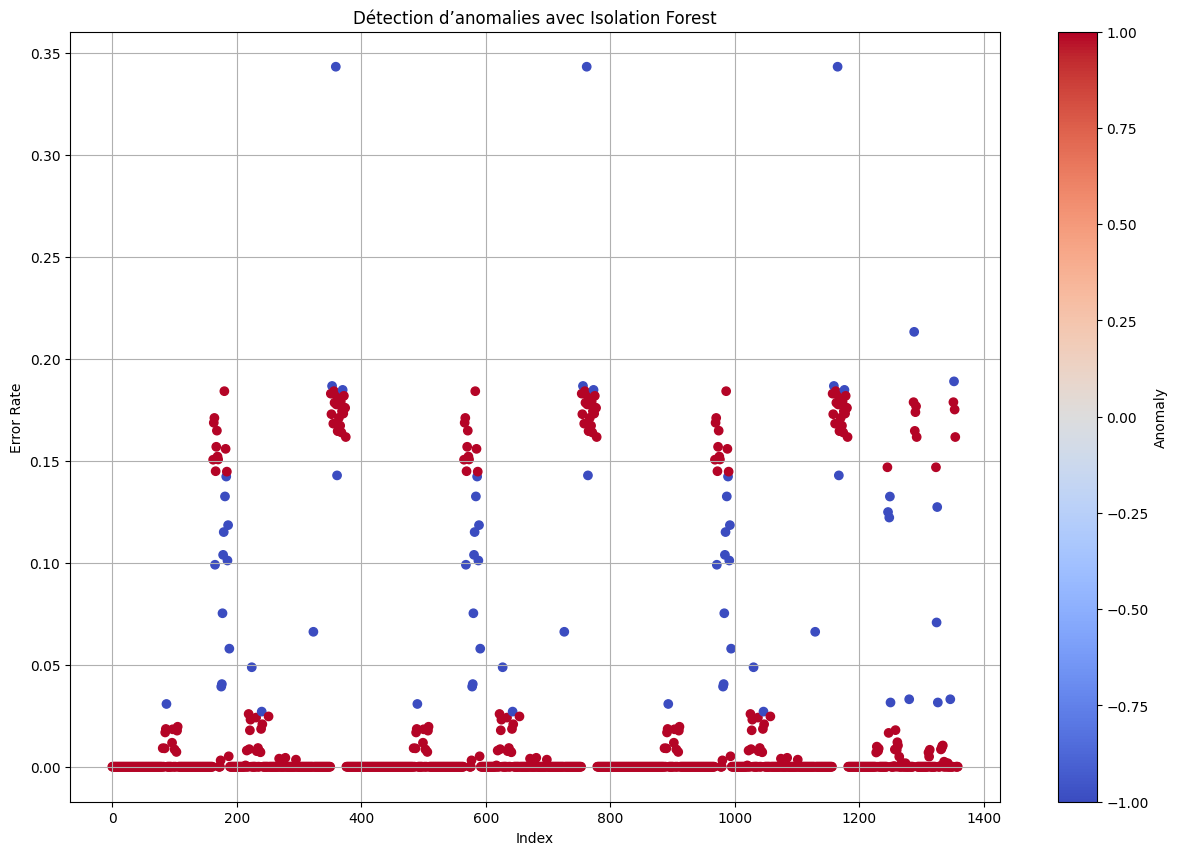

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


# Fonction de classification du statut
def classify_status(error_rate):
    if error_rate == 0.0:
        return "Healthy"
    elif 0.0 < error_rate < 0.18:
        return "Degraded"
    else:
        return "Unavailable"

# Charger le fichier CSV
df = pd.read_csv('kiali_kpi_metrics.csv')

# Ne garder que error_rate
data = df[['error_rate']].copy()

# Nettoyer les données
data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data.dropna(inplace=True)

# Synchroniser le df principal
df = df.loc[data.index].reset_index(drop=True)
data = data.reset_index(drop=True)

# Ajouter la colonne 'status'
df['status'] = df['error_rate'].apply(classify_status)

# Standardiser error_rate
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 1. Isolation Forest
iso_model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_iso'] = iso_model.fit_predict(scaled_data)

# Affichage des anomalies par Isolation Forest
plt.figure(figsize=(15, 10))
plt.scatter(df.index, df['error_rate'], c=df['anomaly_iso'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Error Rate')
plt.title('Détection d’anomalies avec Isolation Forest')
plt.grid(True)
plt.colorbar(label='Anomaly')
plt.show()

# Sauvegarder les résultats
df.to_csv('kiali_anomaly_results_error_rate.csv', index=False)


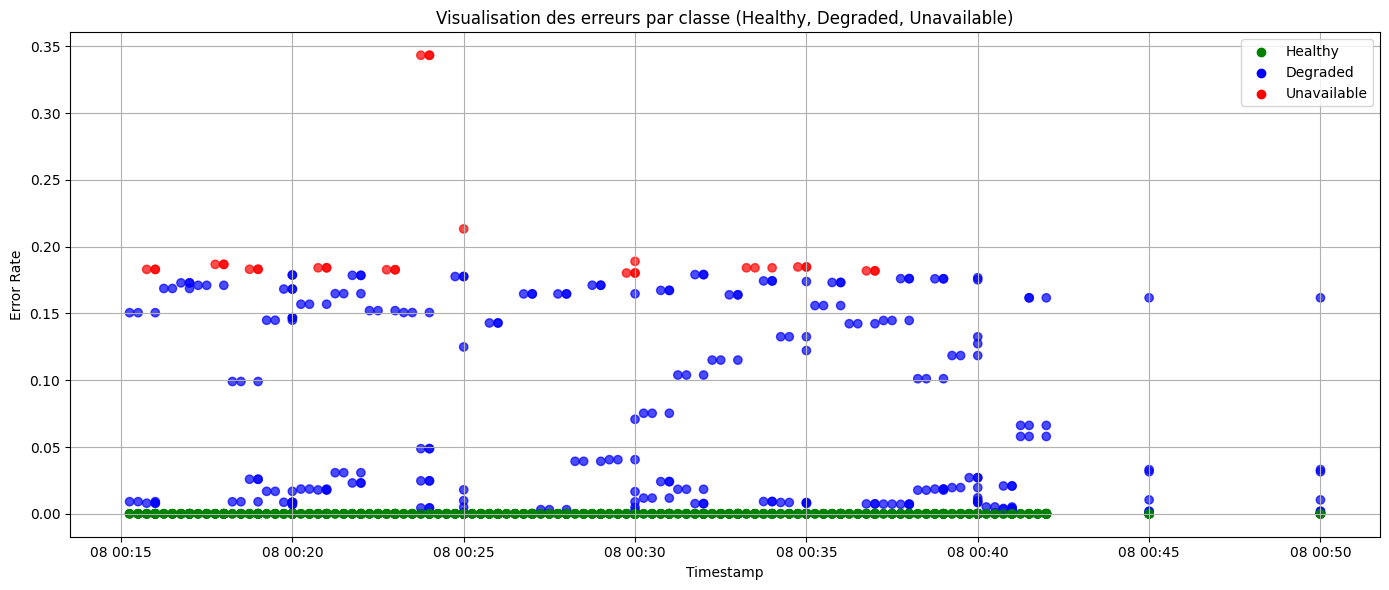

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Charger le fichier CSV
df = pd.read_csv('kiali_anomaly_results_error_rate.csv')

# 2. Convertir la colonne timestamp en datetime (si ce n'est pas déjà fait)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 3. Mapper les couleurs en fonction du statut
status_colors = {
    'Healthy': 'green',
    'Degraded': 'blue',
    'Unavailable': 'red'
}
df['color'] = df['status'].map(status_colors)

# 4. Tracer les points d’erreur au fil du temps
plt.figure(figsize=(14, 6))
plt.scatter(df['timestamp'], df['error_rate'], c=df['color'], label=None, alpha=0.7)

# 5. Ajout des légendes et titres
for status, color in status_colors.items():
    plt.scatter([], [], color=color, label=status)

plt.xlabel('Timestamp')
plt.ylabel('Error Rate')
plt.title('Visualisation des erreurs par classe (Healthy, Degraded, Unavailable)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


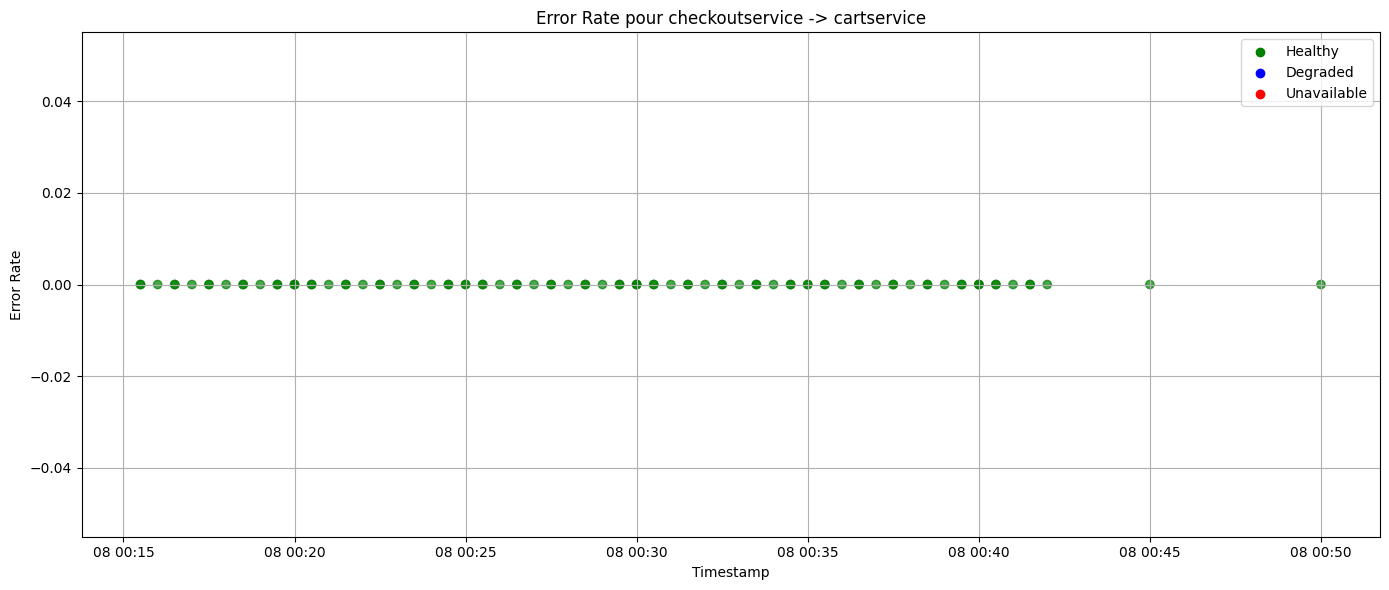

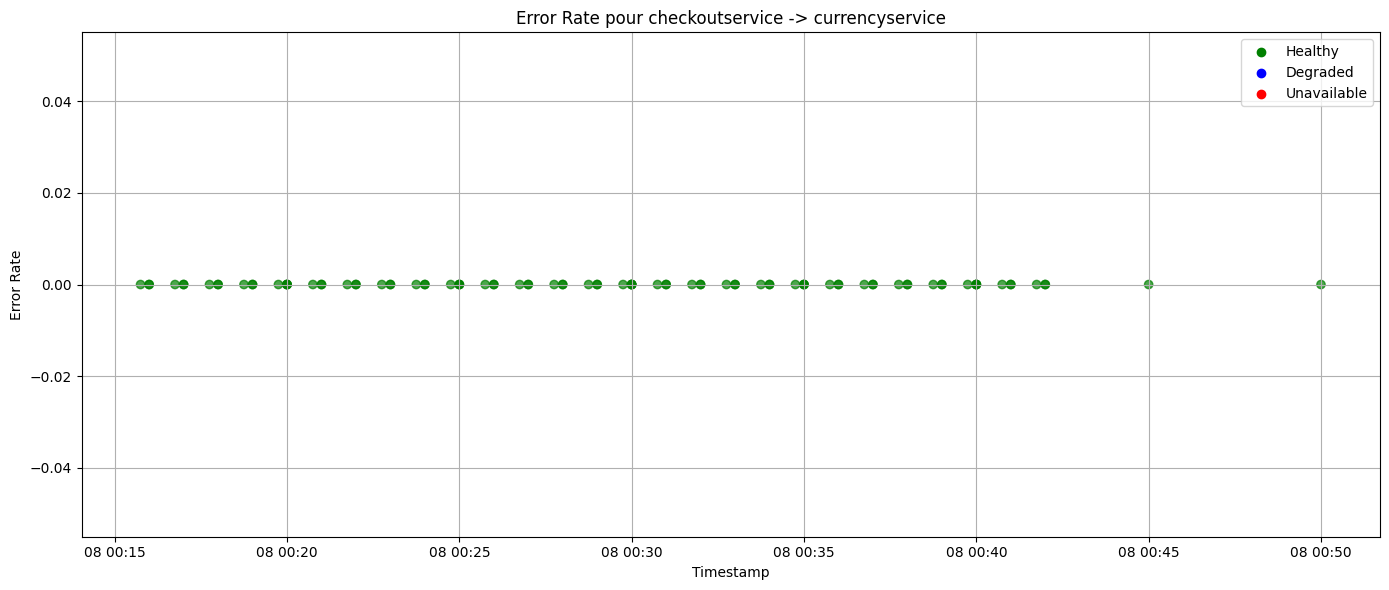

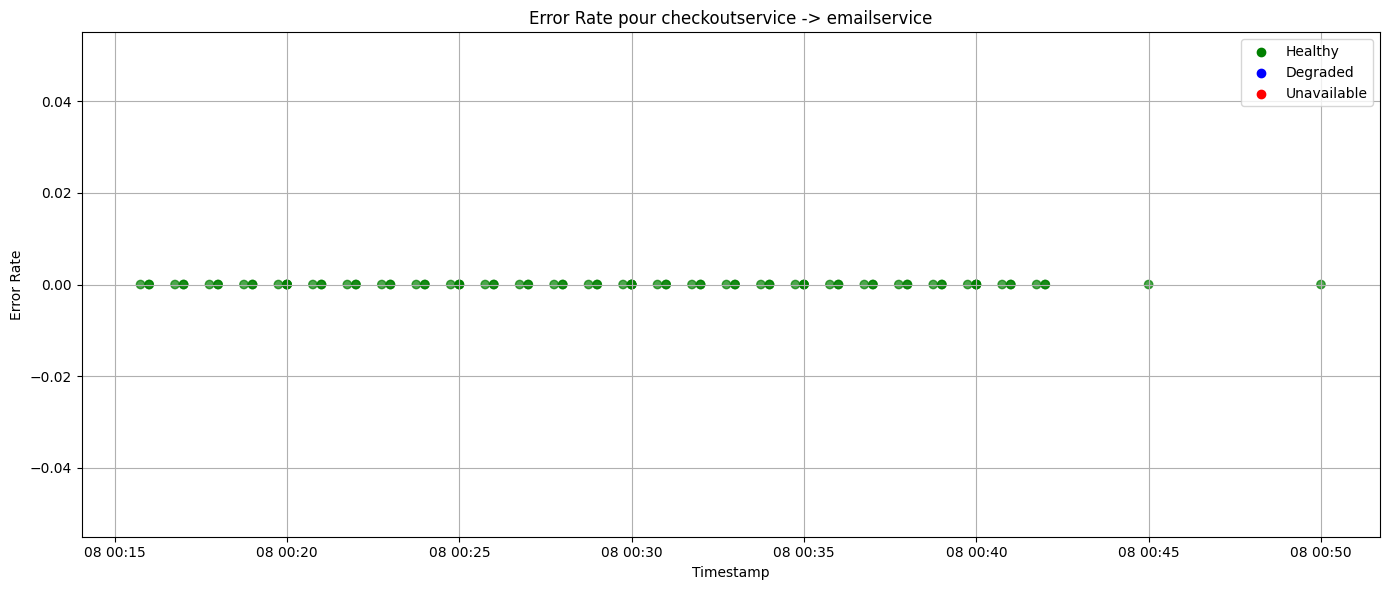

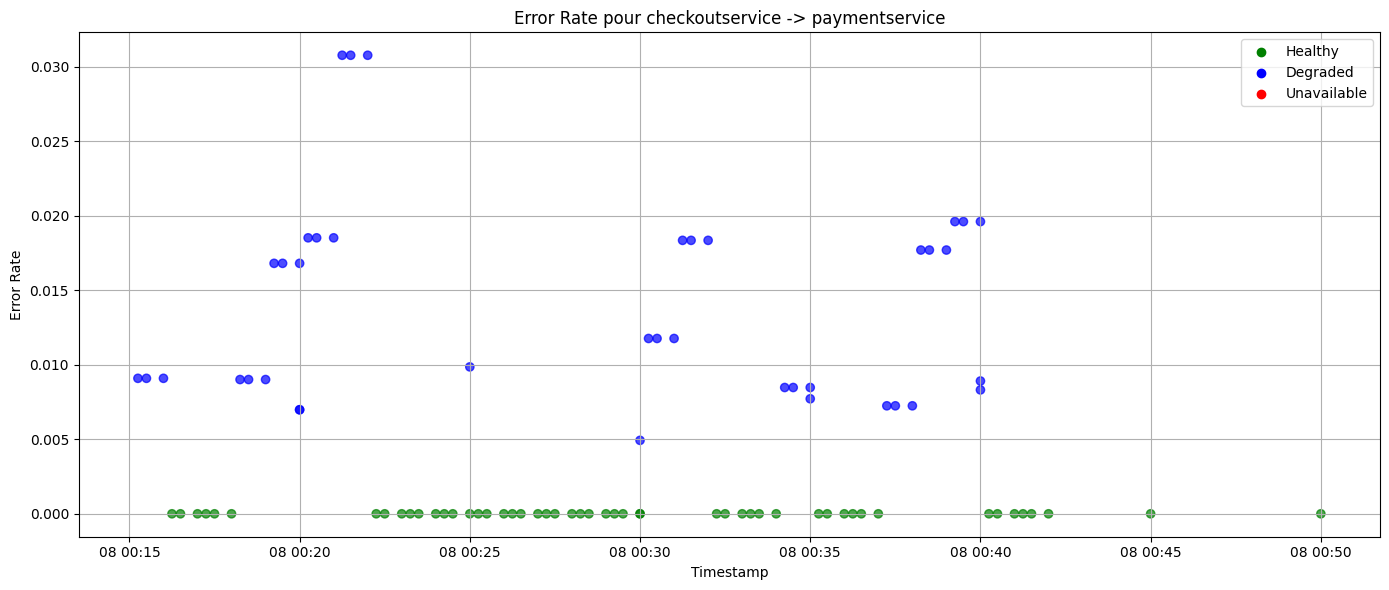

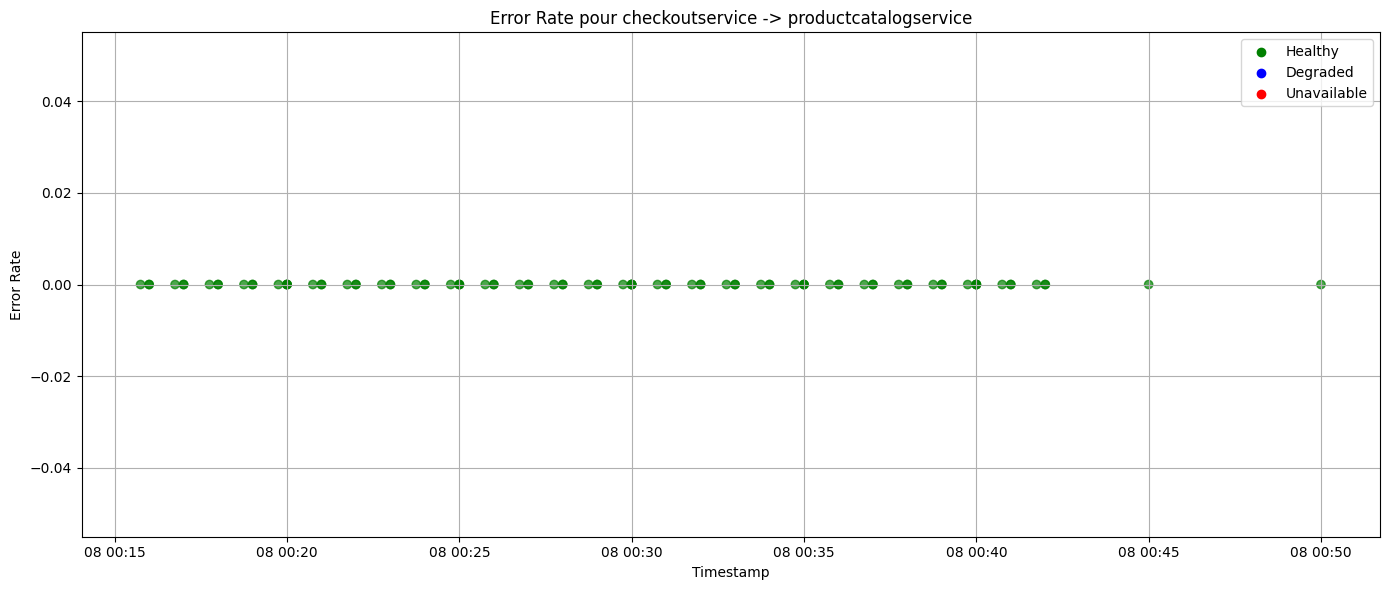

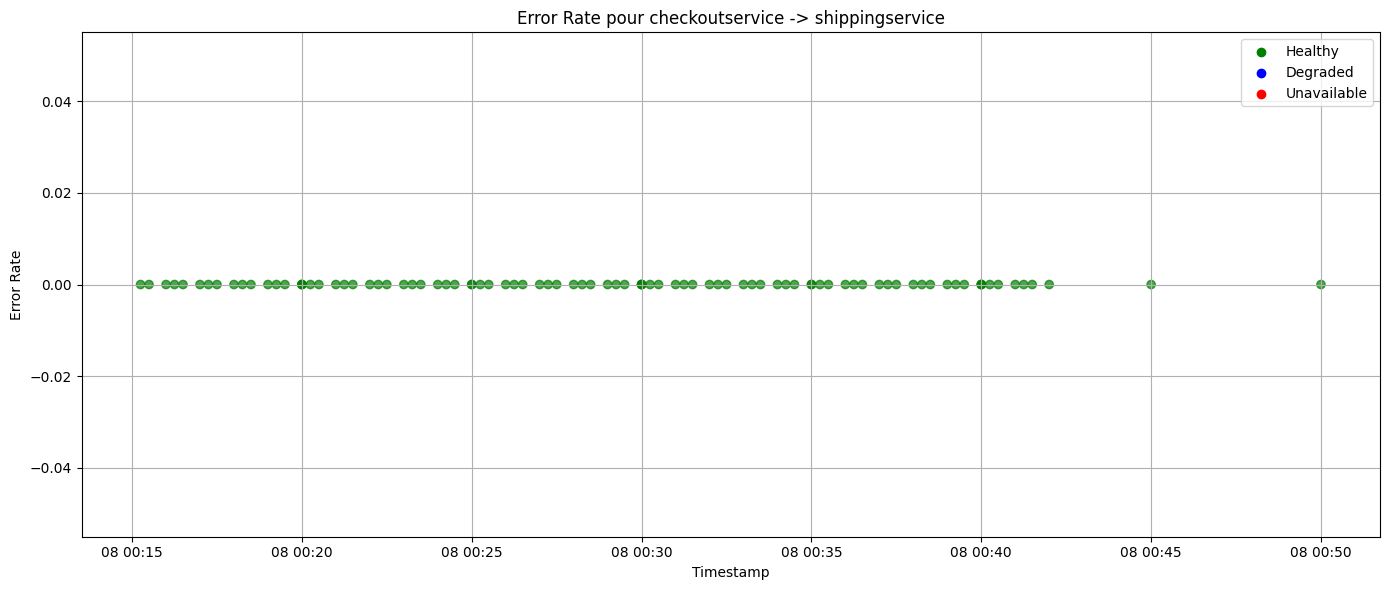

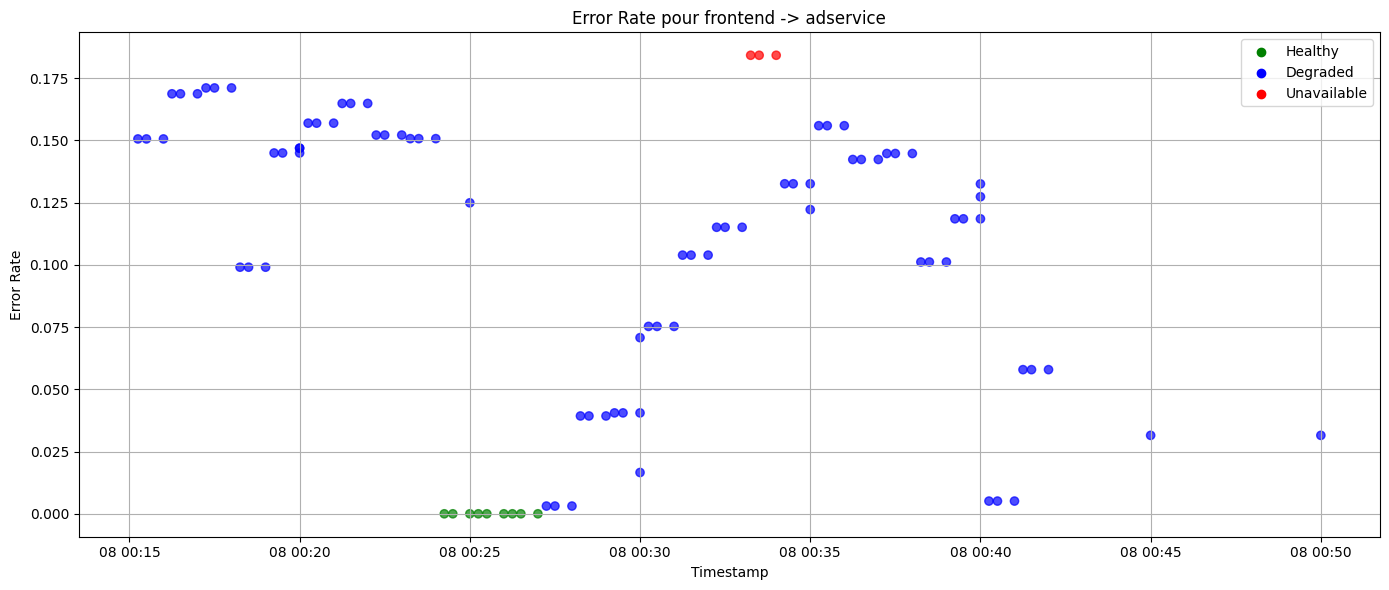

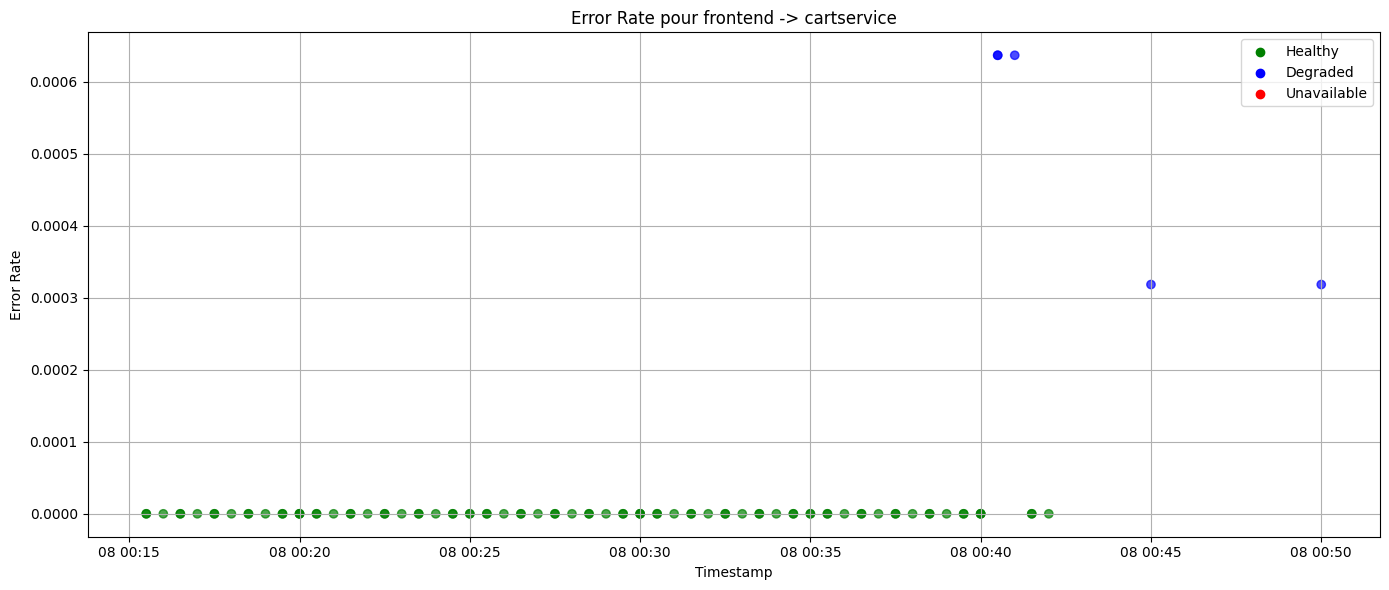

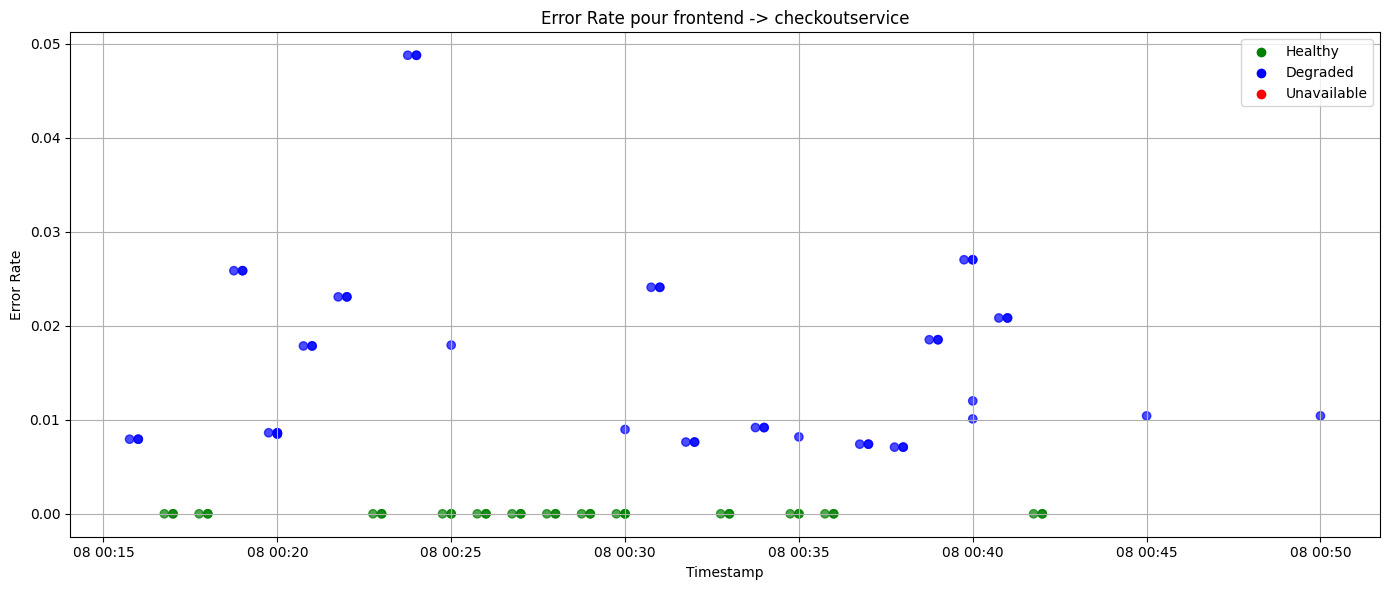

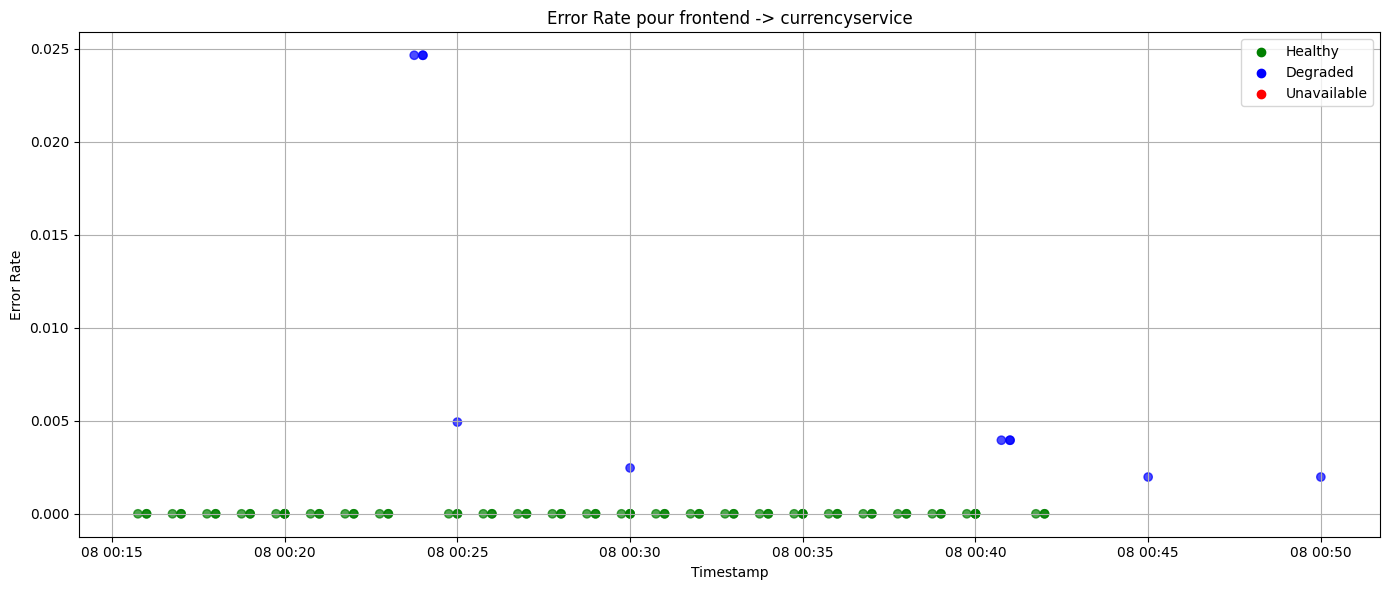

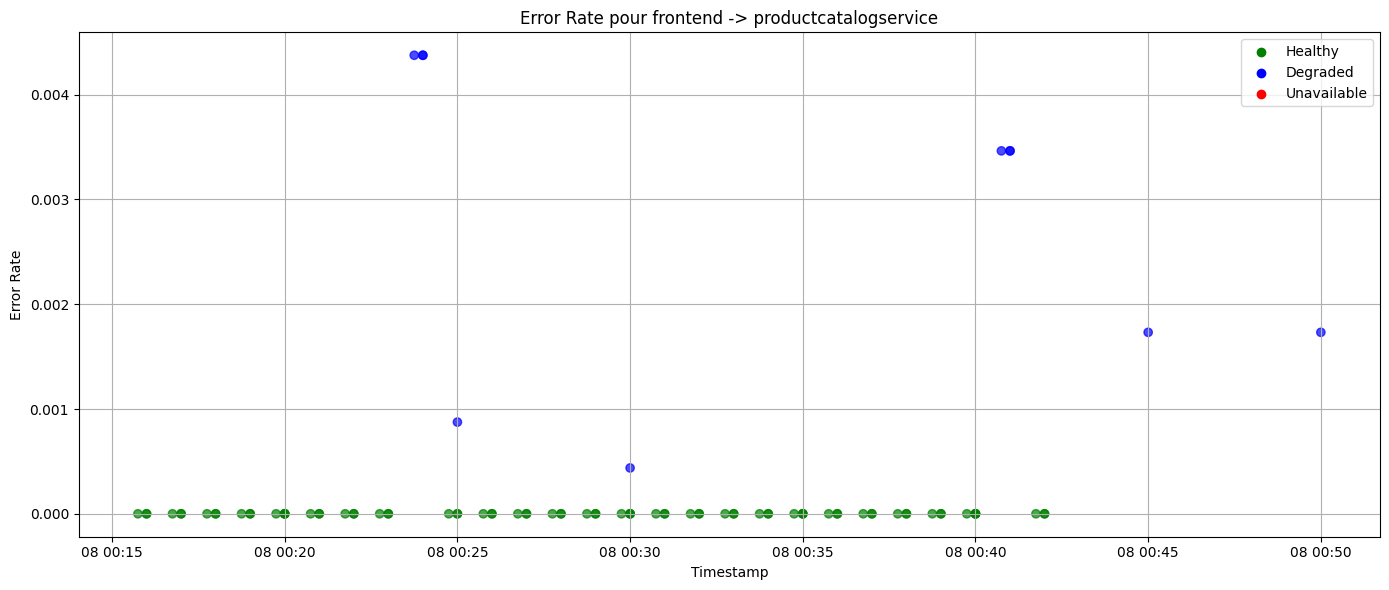

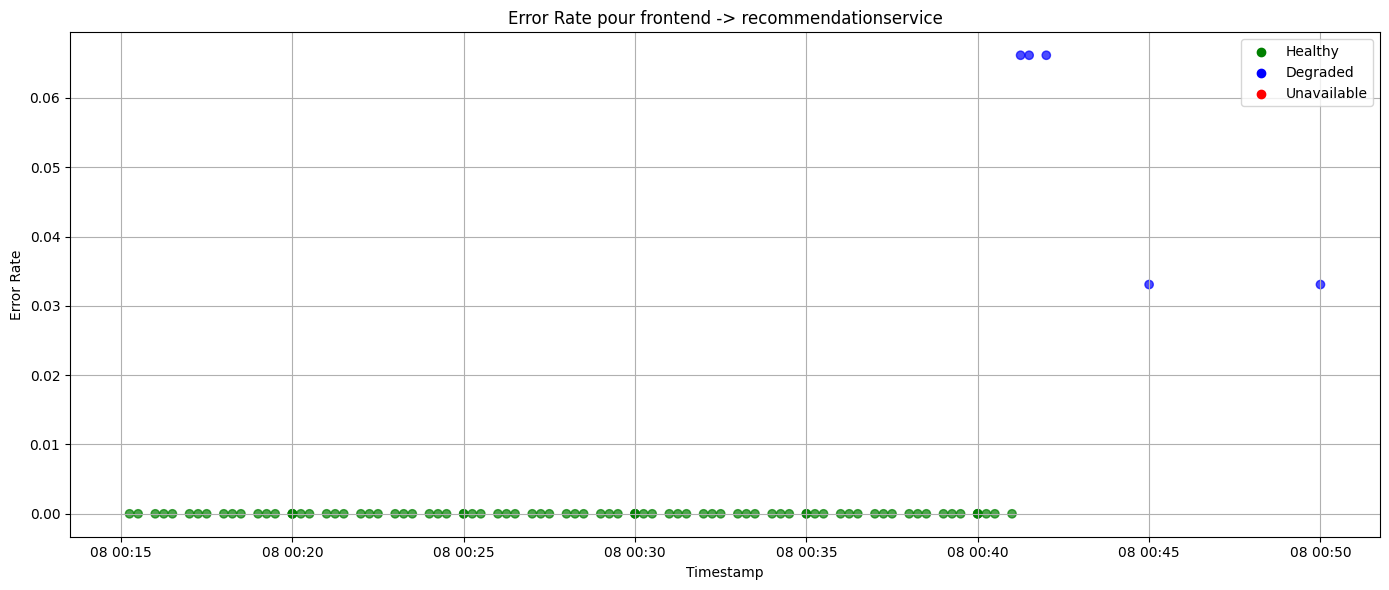

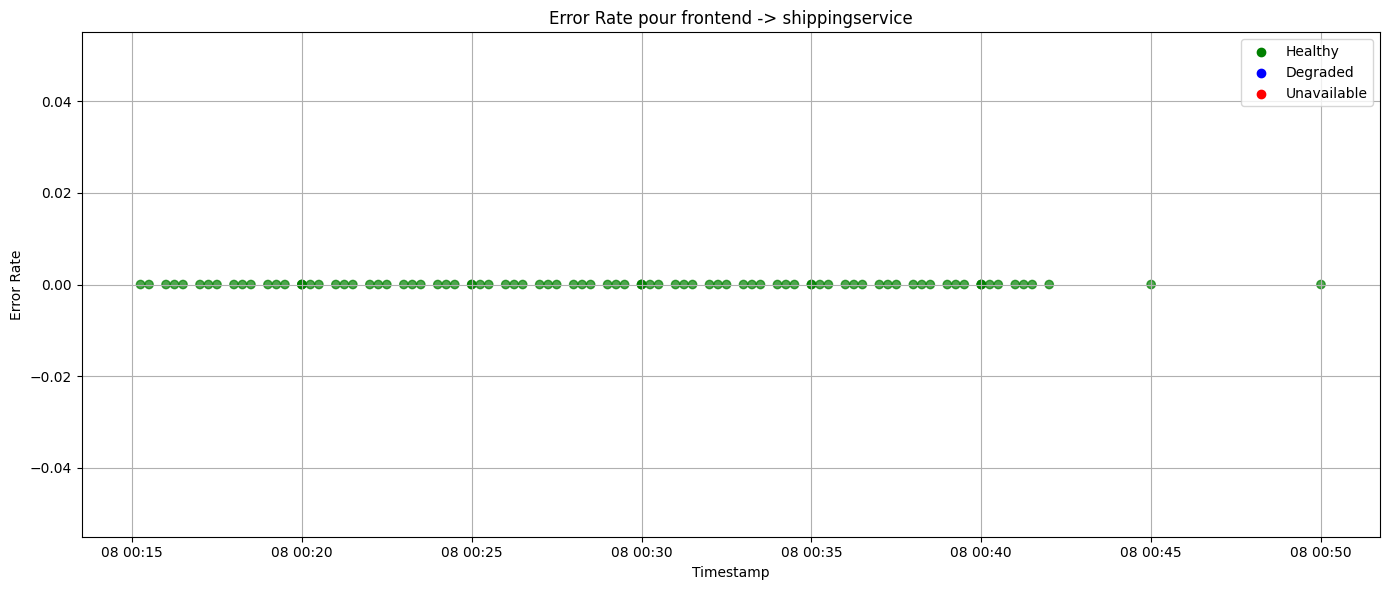

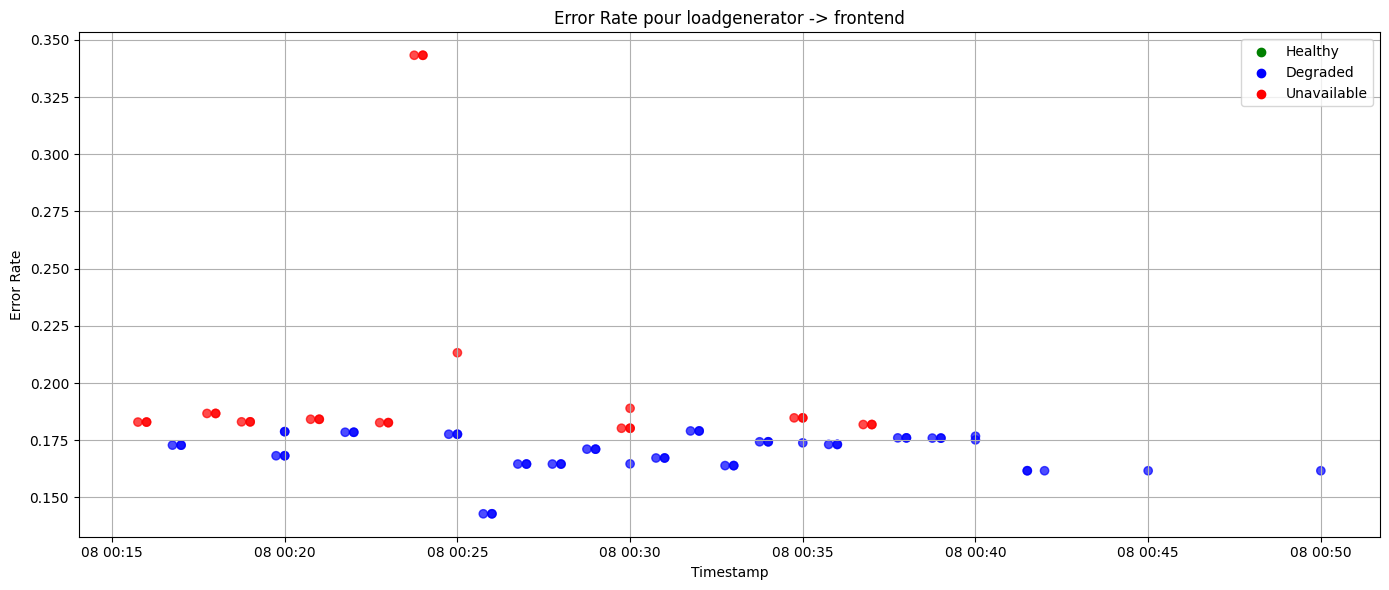

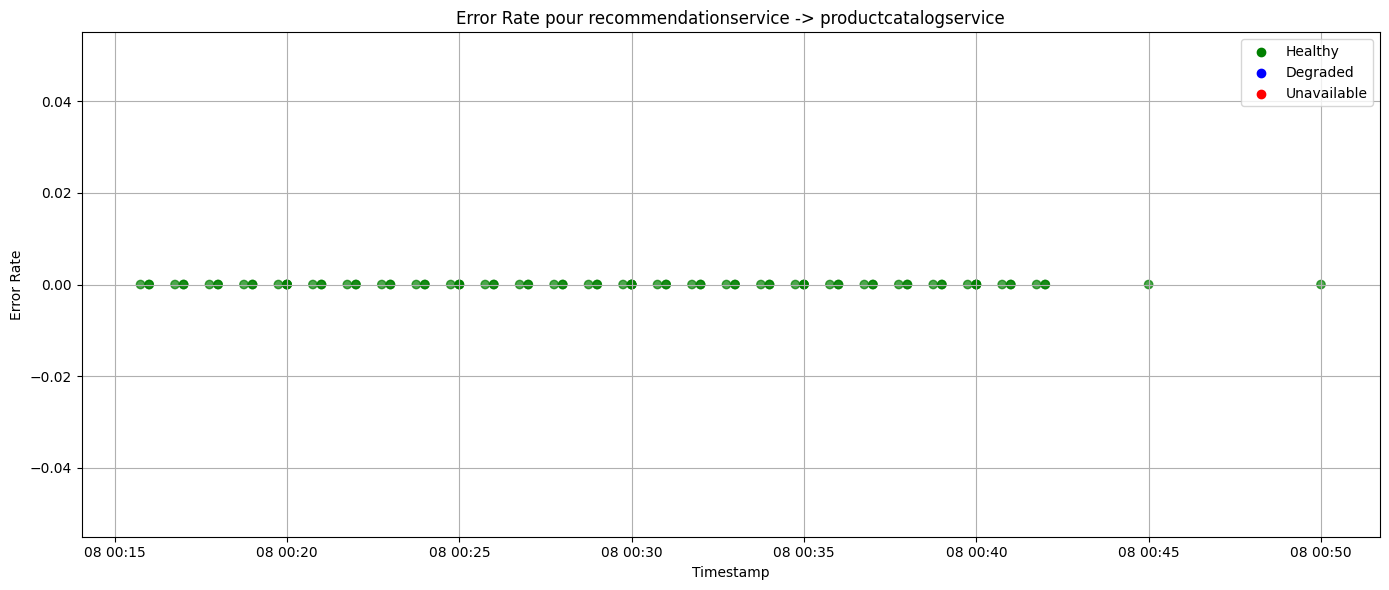

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Charger le fichier CSV
df = pd.read_csv('kiali_anomaly_results_error_rate.csv')

# 2. Convertir la colonne timestamp en datetime (si ce n'est pas déjà fait)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 3. Mapper les couleurs en fonction du statut
status_colors = {
    'Healthy': 'green',
    'Degraded': 'blue',
    'Unavailable': 'red'
}
df['color'] = df['status'].map(status_colors)

# 4. Créer un graphique pour chaque paire de microservices (source, destination)
pairs = df[['source_workload', 'destination_workload']].drop_duplicates()

# 5. Parcourir chaque paire pour créer les graphiques
for _, pair in pairs.iterrows():
    source = pair['source_workload']
    destination = pair['destination_workload']
    
    # Filtrer les données pour cette paire
    subset = df[(df['source_workload'] == source) & (df['destination_workload'] == destination)]
    
    # Tracer les points d’erreur au fil du temps
    plt.figure(figsize=(14, 6))
    plt.scatter(subset['timestamp'], subset['error_rate'], c=subset['color'], label=None, alpha=0.7)

    # Ajouter des légendes et des titres
    for status, color in status_colors.items():
        plt.scatter([], [], color=color, label=status)
    
    plt.xlabel('Timestamp')
    plt.ylabel('Error Rate')
    plt.title(f'Error Rate pour {source} -> {destination}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()
